Tutorial from https://www.machinecurve.com/index.php/2020/02/25/training-your-neural-network-with-cyclical-learning-rates/

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from CLR.clr_callback import CyclicLR
from LRF.lr_finder import LRFinder

/home/greg/standard_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/greg/standard_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/greg/standard_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/greg/standard_env/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 28, 28, 1
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 15
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32').reshape((input_train.shape[0], img_width, img_height, img_num_channels))
input_test = input_test.astype('float32').reshape((input_test.shape[0], img_width, img_height, img_num_channels))

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
##
## LR Finder specific code
##

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [6]:
# Configuration settings for LR finder
start_lr = 1e-4
end_lr = 1e0
no_epochs = 10

Epoch 1/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 2.2878 - acc: 0.1356
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 2.2454 - acc: 0.2418
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 2.1479 - acc: 0.3070
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 2.0237 - acc: 0.3277
Epoch 5/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 1.9280 - acc: 0.3560
Epoch 6/10
60000/60000 [==============================] - 102s 2ms/sample - loss: 2.0043 - acc: 0.3371
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/sample - loss: 2.1799 - acc: 0.2697
Epoch 8/10
41250/60000 [===================>..........] - ETA: 34s - loss: 2.4875 - acc: 0.1954

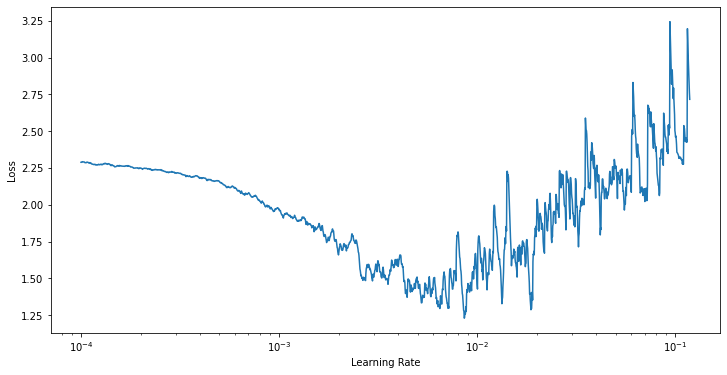

In [7]:
# Define LR finder callback
lr_finder = LRFinder(min_lr=start_lr, max_lr=end_lr)

# Perform LR finder
model.fit(input_train, target_train, batch_size=batch_size, callbacks=[lr_finder], epochs=no_epochs)

In [8]:
##
## LR Finder specific code
##

In [9]:
# Set CLR options
clr_step_size = int(4 * (len(input_train)/batch_size))
base_lr = 1e-4
max_lr = 1e-2
mode='triangular'

In [10]:
# Define the callback
clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)

In [11]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split,
            callbacks=[clr])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 91s 2ms/sample - loss: 0.3771 - acc: 0.8918 - val_loss: 0.0680 - val_acc: 0.9801
Epoch 2/10
48000/48000 [==============================] - 81s 2ms/sample - loss: 0.0710 - acc: 0.9783 - val_loss: 0.0672 - val_acc: 0.9802
Epoch 3/10
48000/48000 [==============================] - 76s 2ms/sample - loss: 0.0628 - acc: 0.9803 - val_loss: 0.0679 - val_acc: 0.9837
Epoch 4/10
48000/48000 [==============================] - 34s 705us/sample - loss: 0.0670 - acc: 0.9810 - val_loss: 0.1493 - val_acc: 0.9638
Epoch 5/10
48000/48000 [==============================] - 42s 866us/sample - loss: 0.0801 - acc: 0.9785 - val_loss: 0.1356 - val_acc: 0.9732
Epoch 6/10
48000/48000 [==============================] - 64s 1ms/sample - loss: 0.0807 - acc: 0.9808 - val_loss: 0.0733 - val_acc: 0.9840
Epoch 7/10
48000/48000 [==============================] - 64s 1ms/sample - loss: 0.0430 - acc: 0.9892 - val_loss